# Model Evaluation

🎯 Goal:

Understand how well your model performs with numbers, visuals, and business context using all relevant evaluation strategies.

## Summary Table:

| Metric                    | Best For                            |
| ------------------------- | ----------------------------------- |
| Accuracy                  | General performance (balanced data) |
| Precision / Recall / F1   | Imbalanced datasets                 |
| Confusion Matrix          | Class-wise breakdown                |
| ROC-AUC                   | Probabilistic classifiers           |
| Precision-Recall Curve    | Rare event detection                |
| Calibration Curve         | Confidence reliability              |
| KS-Statistic              | Risk scoring, churn, credit models  |
| Cross-Validation          | Model stability                     |
| Feature Importance / SHAP | Interpretability                    |


In [2]:
# 📦 Dataset & Model Setup (Classification Example)

# We’ll simulate a classification problem for churn prediction.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

X, y = make_classification(n_samples=1000, n_features=10, n_informative=6, n_redundant=2, weights=[0.7, 0.3], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]


## 1️⃣ Accuracy & Basic Metrics

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Use when classes are balanced.


Accuracy: 0.91
Precision: 0.8412698412698413
Recall: 0.8688524590163934
F1 Score: 0.8548387096774194


## 2️⃣ Confusion Matrix

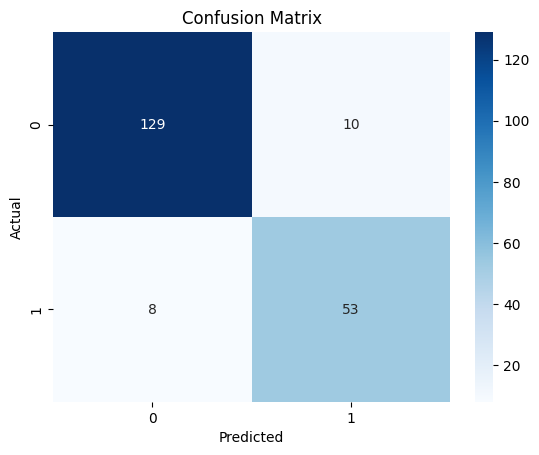

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Understand True Positives, False Positives, etc.


## 3️⃣ ROC Curve & AUC

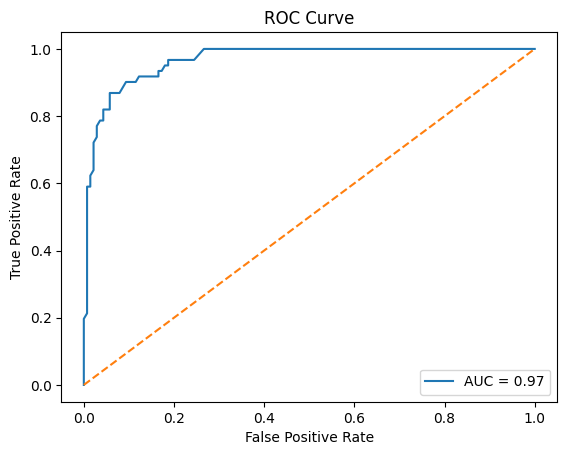

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Best for binary classification.




## 4️⃣ Precision-Recall Curve (Imbalanced Data)

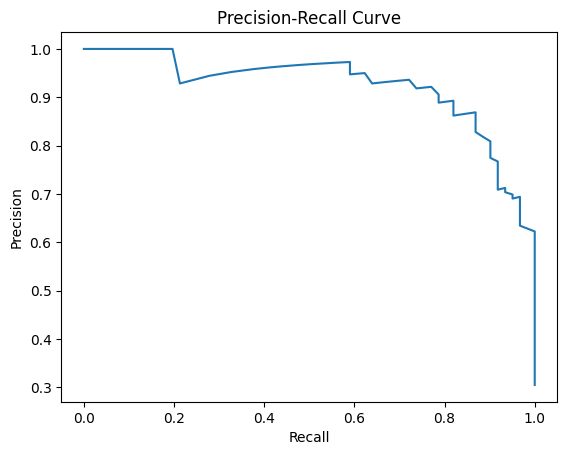

In [9]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Best when positive class is rare.

## 5️⃣ Classification Report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Get precision, recall, f1 for each class.



              precision    recall  f1-score   support

           0       0.94      0.93      0.93       139
           1       0.84      0.87      0.85        61

    accuracy                           0.91       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.91      0.91      0.91       200



## 6️⃣ Calibration Curve (Probability Confidence)

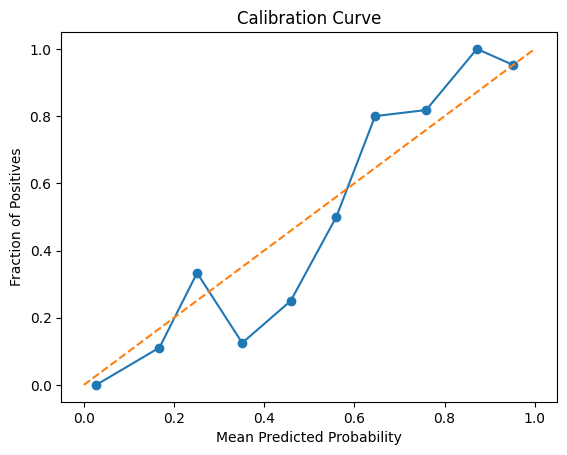

In [11]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy='uniform')

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.title("Calibration Curve")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.show()

# Use when you're concerned about how well predicted probabilities reflect reality.



## 7️⃣ Lift & Gain Chart
Use for business value prediction (optional — custom implementation if needed).



## 8️⃣ KS-Statistic (for churn or fraud models)

In [12]:
import scipy.stats as stats

df_eval = pd.DataFrame({'y': y_test, 'proba': y_proba})
df_eval = df_eval.sort_values('proba', ascending=False)
df_eval['decile'] = pd.qcut(df_eval['proba'], 10, labels=False)

ks_table = df_eval.groupby('decile').agg(
    positives=('y', 'sum'),
    negatives=('y', lambda x: len(x) - sum(x))
)

ks_table['cum_pos'] = ks_table['positives'].cumsum()
ks_table['cum_neg'] = ks_table['negatives'].cumsum()
ks_table['ks'] = abs(ks_table['cum_pos'] / ks_table['positives'].sum() - ks_table['cum_neg'] / ks_table['negatives'].sum())
ks_stat = ks_table['ks'].max()

print(f"KS-Statistic: {ks_stat:.3f}")

# Measures maximum separation between positive and negative cumulative distributions.



KS-Statistic: 0.779


## 9️⃣ Feature Importance


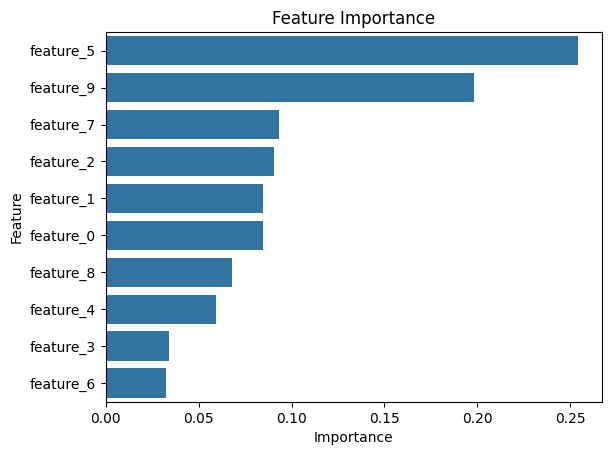

In [13]:
importances = model.feature_importances_
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance")
plt.show()

# Helps with interpretability.



## 🔟 Cross-Validation Scores

In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("CV Mean Accuracy:", scores.mean())

# Ensures your model performs well across folds.

Cross-validation scores: [0.89  0.92  0.91  0.935 0.915]
CV Mean Accuracy: 0.914


## 1️⃣1️⃣ SHAP or LIME for Explainability
Optional advanced analysis for model transparency.